In [45]:
# importing libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg

In [68]:
TRAIN_CSV = './train/train.csv'
DEPTH_CSV = 'depths.csv'

TRAIN_IMAGE_DIR = 'D:/_0Luciano/_0PHD/datasets/tgsSalt/train/images/'
TRAIN_MASK_DIR  = 'D:/_0Luciano/_0PHD/datasets/tgsSalt/train/masks/'

TEST_IMAGE_DIR  = 'D:/_0Luciano_0PHD/datasets/tgsSalt/test/images/'

In [47]:
df_train = pd.read_csv(TRAIN_CSV)
df = df_train
df['salt'] = df['rle_mask'].notnull().replace([False, True], [0,1]) #0 = no_salt #1 = salt
salt = df[df['rle_mask'].notnull()]
df.head()

,id,rle_mask,salt
0,575d24d81d,NaN,0
1,a266a2a9df,5051 5151,1
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...,1
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...,1
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...,1


In [105]:
df.columns

Index(['id', 'rle_mask', 'salt', 'coverage'], dtype='object')

In [100]:
def limites(msk):
        number_of_white_pix = np.sum(msk == 255)
        if (number_of_white_pix>(10201*0.1)) & (number_of_white_pix<(10201*0.9)):
                result = True
        else:
                result = False
    
        return result

TRAIN_MASK_DIR  = 'D:/_0Luciano/_0PHD/datasets/tgsSalt/train/masks/'

def coverage(label):
        path = TRAIN_MASK_DIR + f'{label}.png'
        white_pix = 0
        if exists(path):
                mask = cv2.imread(path)
                gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
                white_pix = np.sum(gray == 255)
        return white_pix/10201

 # a coluna coverage em todas as linhas do df recebe o resultado da função coverage(id)
df['coverage']=df['id'].map(coverage)


In [106]:
coverage('75efad62c1')

D:/_0Luciano/_0PHD/datasets/tgsSalt/train/masks/75efad62c1.png


0.993333986864033

In [117]:
def cov_to_class(val):    
    for i in range(0, 11):
        if 10*val <= i :
            return i
        
df["coverage_class"] = df.coverage.map(cov_to_class)

In [130]:
def tru(x):
    return math.trunc(10*x)

In [131]:
import math
df["coverage_class"] = df.coverage.map(tru)

In [135]:
df.head(20)

,id,rle_mask,salt,coverage,coverage_class
0,575d24d81d,NaN,0,0.000000,0
1,a266a2a9df,5051 5151,1,0.504950,5
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...,1,0.993334,9
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...,1,0.149201,1
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...,1,0.042839,0
5,782ae9b7e7,1 1815 1819 90 1920 81 2021 73 2122 64 2223 55...,1,0.225370,2
6,9842f69f8d,NaN,0,0.000000,0
7,aa94cfb806,1 28 102 28 203 29 304 30 405 32 506 33 607 34...,1,0.665817,6
8,50d3073821,1 2121 9293 909,1,0.297030,2
9,28f865caaa,NaN,0,0.000000,0


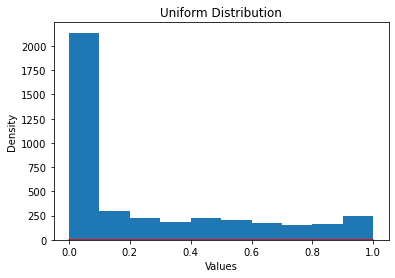

array([0.        , 0.0999902 , 0.19998039, 0.29997059, 0.39996079,
       0.49995099, 0.59994118, 0.69993138, 0.79992158, 0.89991177,
       0.99990197])

In [133]:
count, bins, ignored = plt.hist(df['coverage'], 10, density=False)
plt.plot(bins, np.ones_like(bins),color='r')
plt.title('Uniform Distribution')
plt.ylabel('Density')
plt.xlabel('Values')
plt.show()
bins

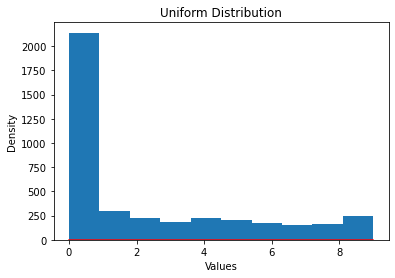

array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ])

In [134]:
count, bins, ignored = plt.hist(df['coverage_class'], 10, density=False)
plt.plot(bins, np.ones_like(bins),color='r')
plt.title('Uniform Distribution')
plt.ylabel('Density')
plt.xlabel('Values')
plt.show()
bins

In [6]:
rand_idx = np.random.randint(0, 2438, 10) #generate 10 random indexes from 0 to 4000

In [37]:
101*101

10201

In [39]:
gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
number_of_white_pix = np.sum(gray == 255)
number_of_white_pix/101/101

0.817566905205372

In [56]:
fig = plt.figure(figsize=(20, 5))
for i,file in enumerate(rand_idx):
    figs = salt['id'][file]
    path = TRAIN_MASK_DIR + f'{figs}.png'
    mask = cv2.imread(f'train/masks/{figs}.png')
    msk = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    thresholds = limites(msk)
    print (i+1, thresholds )

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-u4kjpz2z\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


<Figure size 1440x360 with 0 Axes>

FileNotFoundError: [Errno 2] No such file or directory: 'train/masks/2d64b6a8cf.png'

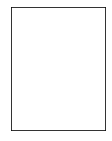

In [57]:
#check sample image
fig = plt.figure(figsize=(20, 5))
for i,file in enumerate(rand_idx):
    ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks = [])
    figs = salt['id'][file]
    mask = mpimg.imread(f'train/masks/{figs}.png')
    ax.imshow(mask, alpha=0.35, cmap='gray')
plt.tight_layout()
plt.show()


In [11]:
file = 2906
figs=df['id'][file]
img = mpimg.imread(TRAIN_IMAGE_DIR+f'{figs}.png')
mask = cv2.imread(TRAIN_MASK_DIR+f'{figs}.png')

FileNotFoundError: [Errno 2] No such file or directory: './train/images/9bf022776e.png'

In [25]:
img = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
msk = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

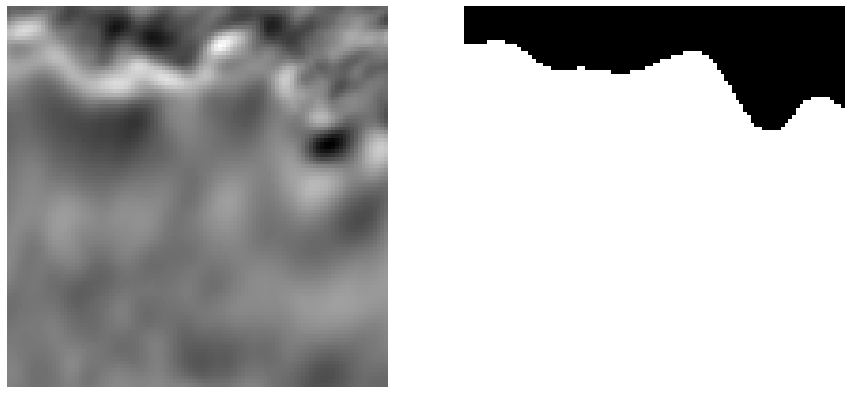

In [28]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 2, 1); plt.imshow(bgr);  plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(msk,cmap='gray',); plt.axis('off')
plt.show()

In [30]:
# counting the number of pixels
number_of_white_pix = np.sum(msk == 255)
number_of_black_pix = np.sum(msk == 0)
  
print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels:', number_of_black_pix)

Number of white pixels: 8340
Number of black pixels: 1861


In [37]:
if (number_of_white_pix>1000) & (number_of_white_pix<9000):
    print (True)
else:
    print (False)


True
